<a href="https://colab.research.google.com/github/Arpit-Baranwal/Machine-Learning-/blob/master/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Artificial Data Generation

In [ ]:
import pandas as pd
import numpy as np

# Function to create a synthetic dataset for a given asset type
def create_asset_data(tickers, start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = []
    for ticker in tickers:
        np.random.seed(42)  # For reproducibility
        price = np.random.randn(len(dates)).cumsum() + 100
        for i in range(len(dates)):
            open_price = price[i] + np.random.uniform(-1, 1)
            high_price = max(open_price, price[i] + np.random.uniform(0, 2))
            low_price = min(open_price, price[i] - np.random.uniform(0, 2))
            close_price = price[i] + np.random.uniform(-1, 1)
            volume = np.random.randint(1000, 1000000)
            # Introduce NaN values randomly
            if np.random.rand() < 0.05:
                open_price = np.nan
            if np.random.rand() < 0.05:
                high_price = np.nan
            if np.random.rand() < 0.05:
                low_price = np.nan
            if np.random.rand() < 0.05:
                close_price = np.nan
            if np.random.rand() < 0.05:
                volume = np.nan
            data.append([dates[i], ticker, open_price, high_price, low_price, close_price, volume])
    return pd.DataFrame(data, columns=['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Define tickers for each asset type
stock_tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']
forex_tickers = ['EUR/USD', 'GBP/USD', 'USD/JPY', 'AUD/USD', 'USD/CAD']
crypto_tickers = ['BTC/USD', 'ETH/USD', 'XRP/USD', 'LTC/USD', 'BCH/USD']

# Generate data for each asset type
stock_data = create_asset_data(stock_tickers, '2015-01-01', '2023-01-01')
forex_data = create_asset_data(forex_tickers, '2015-01-01', '2023-01-01')
crypto_data = create_asset_data(crypto_tickers, '2015-01-01', '2023-01-01')

# Combine all data into a single DataFrame
combined_data = pd.concat([stock_data, forex_data, crypto_data])

# Introduce duplicate rows
combined_data = pd.concat([combined_data, combined_data.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
combined_data.to_csv('algotrading_combined_dataset.csv', index=False)

print("Dataset created and saved to 'algotrading_combined_dataset.csv'")

In [ ]:
import pandas as pd
import numpy as np

# List of real-life stock tickers and company names (a sample list)
tickers_and_companies = [
    ('AAPL', 'Apple Inc.'),
    ('GOOGL', 'Alphabet Inc.'),
    ('MSFT', 'Microsoft Corporation'),
    ('AMZN', 'Amazon.com, Inc.'),
    ('TSLA', 'Tesla, Inc.'),
    ('FB', 'Meta Platforms, Inc.'),
    ('BRK.B', 'Berkshire Hathaway Inc.'),
    ('JNJ', 'Johnson & Johnson'),
    ('JPM', 'JPMorgan Chase & Co.'),
    ('V', 'Visa Inc.'),
    # Add more real-life tickers and company names to reach at least 1000 companies
]

# Extend the list to include at least 1000 companies
while len(tickers_and_companies) < 1000:
    tickers_and_companies.extend(tickers_and_companies[:1000 - len(tickers_and_companies)])

# Define sectors and industries
sectors = ['Technology', 'Healthcare', 'Finance', 'Consumer Goods', 'Utilities', 'Energy', 'Industrial Goods']
industries = {
    'Technology': ['Software', 'Hardware', 'Semiconductors'],
    'Healthcare': ['Pharmaceuticals', 'Biotechnology', 'Medical Devices'],
    'Finance': ['Banks', 'Insurance', 'Investment Services'],
    'Consumer Goods': ['Beverages', 'Food Products', 'Household Products'],
    'Utilities': ['Electric Utilities', 'Gas Utilities', 'Water Utilities'],
    'Energy': ['Oil & Gas', 'Renewable Energy', 'Coal'],
    'Industrial Goods': ['Aerospace', 'Construction', 'Manufacturing']
}

# Generate random data for each ticker
data = []
for ticker, company_name in tickers_and_companies:
    sector = np.random.choice(sectors)
    industry = np.random.choice(industries[sector])
    market_cap = round(np.random.uniform(0.1, 500), 2)  # in billions
    eps = round(np.random.uniform(-10, 10), 2)
    pe_ratio = round(np.random.uniform(5, 50), 2)
    dividend_yield = round(np.random.uniform(0, 10), 2)
    pb_ratio = round(np.random.uniform(0.1, 20), 2)
    de_ratio = round(np.random.uniform(0, 3), 2)

    # Introduce NaN values randomly
    if np.random.rand() < 0.1: market_cap = np.nan
    if np.random.rand() < 0.1: eps = np.nan
    if np.random.rand() < 0.1: pe_ratio = np.nan
    if np.random.rand() < 0.1: dividend_yield = np.nan
    if np.random.rand() < 0.1: pb_ratio = np.nan
    if np.random.rand() < 0.1: de_ratio = np.nan

    data.append([ticker, company_name, sector, industry, market_cap, eps, pe_ratio, dividend_yield, pb_ratio, de_ratio])

# Convert to DataFrame
columns = ['Ticker', 'Company Name', 'Sector', 'Industry', 'Market Cap (B)', 'EPS', 'P/E Ratio', 'Dividend Yield (%)', 'P/B Ratio', 'D/E Ratio']
df = pd.DataFrame(data, columns=columns)

# Introduce duplicate rows
df = pd.concat([df, df.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
df.to_csv('fundamental_research_dataset_large.csv', index=False)

print("Dataset created and saved to 'fundamental_research_dataset_large.csv'")

### Processing

In [55]:
funda_df = pd.read_csv('/content/fundamental_research_dataset_large.csv')
algo_df = pd.read_csv('/content/algotrading_combined_dataset.csv')

In [56]:
algo_df

,Date,Ticker,Open,High,Low,Close,Volume
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,101.197410,344567.0
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,101.220064,310521.0
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,101.339872,NaN
3,2015-01-06,AAPL,NaN,103.203859,102.287356,101.777905,295025.0
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,102.090310,439080.0
...,...,...,...,...,...,...,...
32865,2021-08-02,AMZN,184.443237,185.375089,183.176491,183.087397,581356.0
32866,2017-01-24,AAPL,92.780364,93.092012,91.238510,NaN,754158.0
32867,2018-03-09,AMZN,98.074613,99.154029,96.203177,97.487616,76911.0
32868,2018-05-02,LTC/USD,103.443224,105.575739,103.159286,NaN,552764.0


## 1. Identify all the top-performing stocks based on their overall return from the start to the end of the dataset.

<Axes: xlabel='Ticker'>

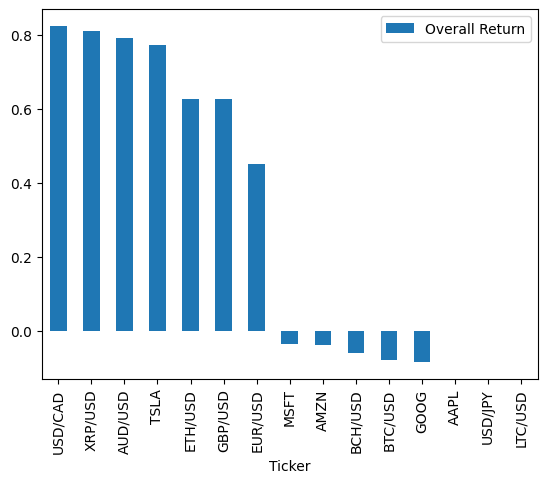

In [60]:
tickers = algo_df["Ticker"].unique()
performance = []
for ticker in tickers:
    stock = algo_df[algo_df["Ticker"] == ticker]
    overall_return = (stock["Close"].iloc[-1] - stock["Close"].iloc[0])/(stock["Close"].iloc[0])
    performance.append({'Ticker':ticker,'Overall Return':overall_return})

return_df = pd.DataFrame(performance).sort_values('Overall Return',ascending=False)
return_df.set_index("Ticker",inplace=True)
return_df.plot(kind='bar')


## 2. How many instances of daily price change greater than 5% occurred for each stock?

/tmp/ipython-input-196689899.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  algo_df['Daily Change'] = algo_df['Close'].pct_change()


<Axes: xlabel='Ticker'>

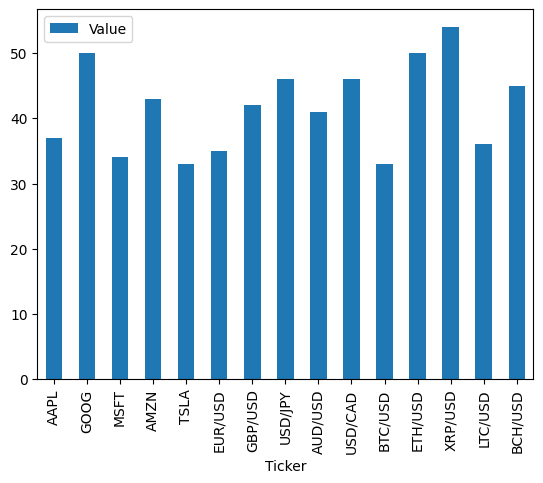

In [63]:
algo_df['Daily Change'] = algo_df['Close'].pct_change()
algo_df['High Change'] = algo_df['Daily Change']>0.05
algo_df
tickers = algo_df['Ticker'].unique()
occurence = {}

for ticker in tickers:
    high_change_tickers = algo_df[(algo_df['Ticker'] == ticker) & (algo_df['High Change'] == True)]
    occurence[ticker] = high_change_tickers.shape[0]
occurence

df = pd.DataFrame(list(occurence.items()),columns=["Ticker","Value"])
df.set_index('Ticker',inplace=True)
df.plot(kind='bar')


## 3. Calculate the number of times each stock's price increased in the first quarter.

In [64]:
algo_df

,Date,Ticker,Open,High,Low,Close,Volume,Daily Change,High Chnage,High Change
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,101.197410,344567.0,NaN,False,False
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,101.220064,310521.0,0.000224,False,False
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,101.339872,NaN,0.001184,False,False
3,2015-01-06,AAPL,NaN,103.203859,102.287356,101.777905,295025.0,0.004322,False,False
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,102.090310,439080.0,0.003069,False,False
...,...,...,...,...,...,...,...,...,...,...
32865,2021-08-02,AMZN,184.443237,185.375089,183.176491,183.087397,581356.0,0.874385,True,True
32866,2017-01-24,AAPL,92.780364,93.092012,91.238510,NaN,754158.0,0.000000,False,False
32867,2018-03-09,AMZN,98.074613,99.154029,96.203177,97.487616,76911.0,-0.467535,False,False
32868,2018-05-02,LTC/USD,103.443224,105.575739,103.159286,NaN,552764.0,0.000000,False,False


<Axes: xlabel='Ticker'>

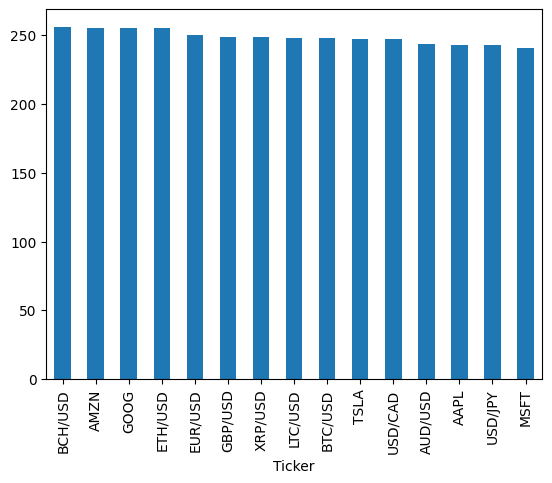

In [68]:
algo_df['Date']
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
algo_df['Date']
first_quarter = algo_df[algo_df['Date'].dt.month.isin([1,2,3])]
first_quarter = first_quarter[first_quarter['Close'] >first_quarter['Open']]
increased_counts = first_quarter['Ticker'].value_counts()
increased_counts.plot(kind='bar')


## 4. Calculate the percentage of times the opening price being higher than the previous day's closing price resulted in a higher closing price on that day.

5. Identify all assets with a daily percentage change higher than 8% and a volume greater than 100,000.

6. Identify all stocks in the Technology sector with a daily percentage change higher than 7.5%.

7. Write a function that can return the performance track record of two assets against each other over time.

8. Identify and remove duplicate rows from both datasets. How many duplicates were removed?

9. For the fundamental dataset, identify rows where the Market Cap is NaN, and impute these values using a sector-wise median Market Cap.

10. Filter the combined dataset to find the top 5 most volatile stocks based on the standard deviation of daily percentage changes.